In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the data of polling
df = pd.read_csv('approval_polllist.csv')
df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/15/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,...,45.0,45.689786,43.597138,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,09:06:25 15 Mar 2020
1,Donald Trump,All polls,3/15/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,...,37.0,44.671553,38.332470,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,09:06:25 15 Mar 2020
2,Donald Trump,All polls,3/15/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,...,45.2,42.854980,44.053279,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,09:06:25 15 Mar 2020
3,Donald Trump,All polls,3/15/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,...,46.0,45.689786,44.597138,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,09:06:25 15 Mar 2020
4,Donald Trump,All polls,3/15/2020,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.208659,...,45.0,46.689786,43.597138,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,09:06:25 15 Mar 2020


In [4]:
# convert 
df.startdate = pd.to_datetime(df.startdate, format = '%m/%d/%Y')
df.enddate = pd.to_datetime(df.enddate, format = '%m/%d/%Y')

df.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/15/2020,2017-01-20,2017-01-22,Gallup,B,1500.0,a,0.241682,...,45.0,45.689786,43.597138,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,09:06:25 15 Mar 2020
1,Donald Trump,All polls,3/15/2020,2017-01-20,2017-01-22,Morning Consult,B/C,1992.0,rv,0.696984,...,37.0,44.671553,38.332470,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,09:06:25 15 Mar 2020
2,Donald Trump,All polls,3/15/2020,2017-01-20,2017-01-24,Ipsos,B-,1632.0,a,0.150785,...,45.2,42.854980,44.053279,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,09:06:25 15 Mar 2020
3,Donald Trump,All polls,3/15/2020,2017-01-21,2017-01-23,Gallup,B,1500.0,a,0.223234,...,46.0,45.689786,44.597138,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,09:06:25 15 Mar 2020
4,Donald Trump,All polls,3/15/2020,2017-01-22,2017-01-24,Gallup,B,1500.0,a,0.208659,...,45.0,46.689786,43.597138,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,09:06:25 15 Mar 2020


# Draw the figure

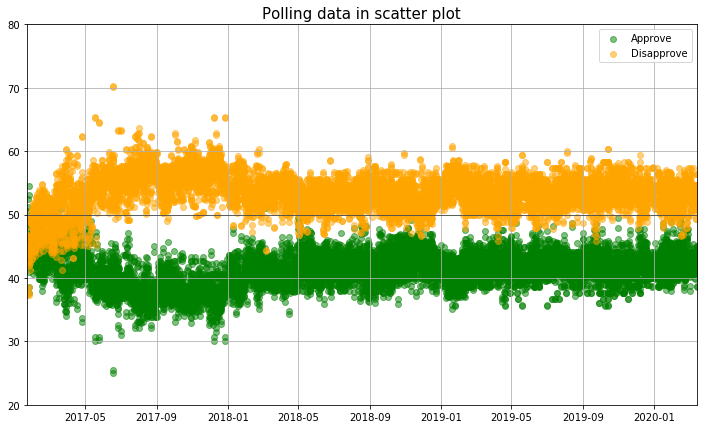

In [80]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.scatter( df.enddate, df.adjusted_approve, alpha = 0.5, color = 'green', label = 'Approve')
ax.scatter( df.enddate, df.adjusted_disapprove, alpha = 0.5, color = 'orange', label = 'Disapprove')
ax.set_ylim([20, 80])
ax.set_xlim([np.min(df['enddate']), np.max(df['enddate'])])
ax.grid()

ax.set_title('Polling data in scatter plot', fontsize = 15)

ax.axhline(50, color = 'black', linewidth = 0.5)
ax.legend()

plt.show()

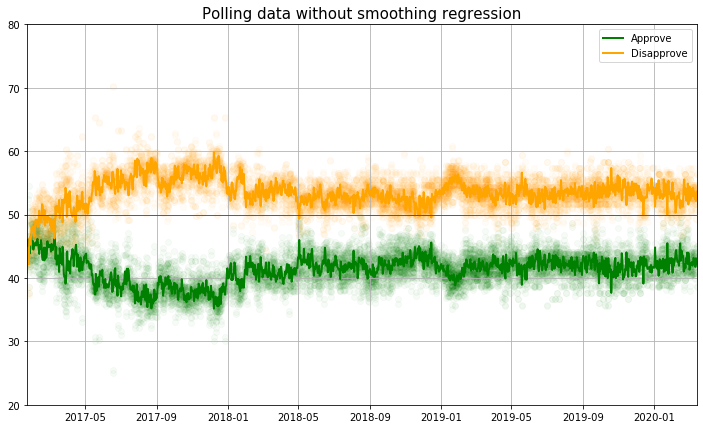

In [79]:
fig, ax = plt.subplots(figsize = (12, 7))

ax.scatter( df.enddate, df.adjusted_approve, alpha = 0.03, color = 'green')
ax.scatter( df.enddate, df.adjusted_disapprove, alpha = 0.03, color = 'orange')
ax.set_ylim([20, 80])
ax.set_xlim([np.min(df['enddate']), np.max(df['enddate'])])
ax.grid()

# apply mean
df_mean = df.groupby('enddate').agg(np.mean)
df_mean = df_mean[['adjusted_approve', 'adjusted_disapprove']]
df_mean.reset_index(inplace = True)

ax.plot(df_mean.enddate, df_mean.adjusted_approve, color = 'green', linestyle = '-', linewidth = 2, label = 'Approve')
ax.plot(df_mean.enddate, df_mean.adjusted_disapprove, color = 'orange', linestyle = '-', linewidth = 2, label = 'Disapprove')
ax.set_title('Polling data without smoothing regression', fontsize = 15)

ax.axhline(50, color = 'black', linewidth = 0.5)
ax.legend()

plt.show()

# Using local regression to smooth the data

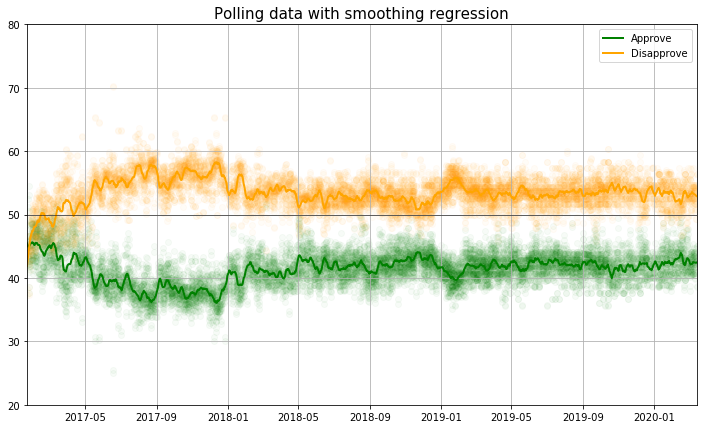

In [83]:
# import scipy 
from scipy.signal import savgol_filter

# use local regression to smooth the data
x_dis = savgol_filter(df_mean.adjusted_disapprove, 13, 3, deriv = 0)
x_a = savgol_filter(df_mean.adjusted_approve, 13, 3, deriv = 0)


fig, ax = plt.subplots(figsize = (12, 7))

ax.scatter( df.enddate, df.adjusted_approve, alpha = 0.03, color = 'green')
ax.scatter( df.enddate, df.adjusted_disapprove, alpha = 0.03, color = 'orange')
ax.set_ylim([20, 80])
ax.set_xlim([np.min(df['enddate']), np.max(df['enddate'])])
ax.grid()

ax.plot(df_mean.enddate, x_a, color = 'green', linestyle = '-', linewidth = 2, label = 'Approve')
ax.plot(df_mean.enddate, x_dis, color = 'orange', linestyle = '-', linewidth = 2, label = 'Disapprove')
ax.set_title('Polling data with smoothing regression', fontsize = 15)

ax.axhline(50, color = 'black', linewidth = 0.5)
ax.legend()

plt.show()


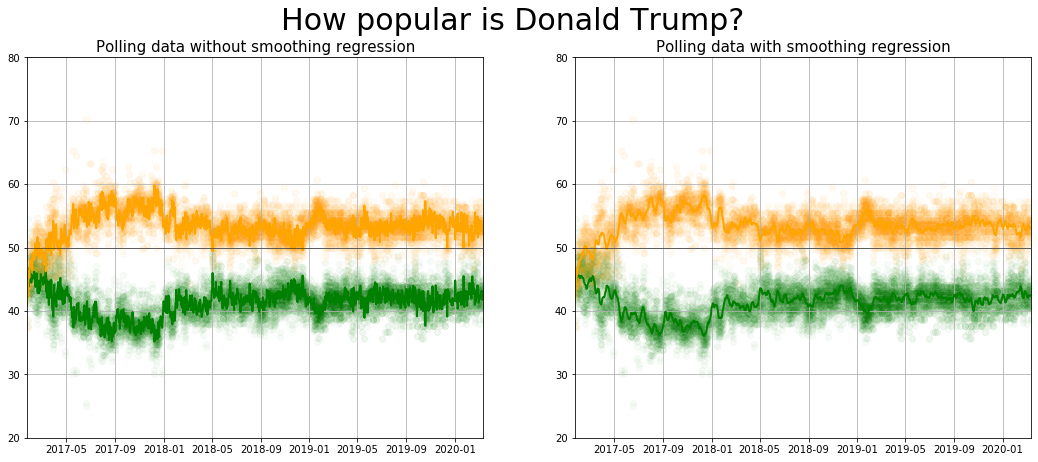

In [70]:
# putting together

fig, ax = plt.subplots(1, 2, figsize = (18, 7))

# left fig

ax[0].scatter( df.enddate, df.adjusted_approve, alpha = 0.03, color = 'green', label = 'Approve')
ax[0].scatter( df.enddate, df.adjusted_disapprove, alpha = 0.03, color = 'orange', label = 'Disapprove')
ax[0].set_ylim([20, 80])
ax[0].set_xlim([np.min(df['enddate']), np.max(df['enddate'])])
ax[0].grid()

# apply mean
df_mean = df.groupby('enddate').agg(np.mean)
df_mean = df_mean[['adjusted_approve', 'adjusted_disapprove']]
df_mean.reset_index(inplace = True)

ax[0].plot(df_mean.enddate, df_mean.adjusted_approve, color = 'green', linestyle = '-', linewidth = 2)
ax[0].plot(df_mean.enddate, df_mean.adjusted_disapprove, color = 'orange', linestyle = '-', linewidth = 2)
ax[0].set_title('Polling data without smoothing regression', fontsize = 15)

ax[0].axhline(50, color = 'black', linewidth = 0.5)

# right fig

ax[1].scatter( df.enddate, df.adjusted_approve, alpha = 0.03, color = 'green', label = 'Approve')
ax[1].scatter( df.enddate, df.adjusted_disapprove, alpha = 0.03, color = 'orange', label = 'Disapprove')
ax[1].set_ylim([20, 80])
ax[1].set_xlim([np.min(df['enddate']), np.max(df['enddate'])])
ax[1].grid()


ax[1].plot(df_mean.enddate, x_a, color = 'green', linestyle = '-', linewidth = 2)
ax[1].plot(df_mean.enddate, x_dis, color = 'orange', linestyle = '-', linewidth = 2)
ax[1].set_title('Polling data with smoothing regression', fontsize = 15)

ax[1].axhline(50, color = 'black', linewidth = 0.5)

fig.suptitle('How popular is Donald Trump?', fontsize = 30)
plt.show()
